<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 3 - LEVEL 2**

---
# **Fraud Detection**


## 1) Data cleaning and preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

df = pd.read_csv("/content/creditcard.csv")


In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(columns=['Time'])


## 2) Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

df['IsoForest_Anomaly'] = iso_forest.fit_predict(df.drop(columns=['Class']))
df['LOF_Anomaly'] = lof.fit_predict(df.drop(columns=['Class']))

print(df['IsoForest_Anomaly'].value_counts())
print(df['LOF_Anomaly'].value_counts())


IsoForest_Anomaly
 1    281958
-1      2849
Name: count, dtype: int64
LOF_Anomaly
 1    281958
-1      2849
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


## 3) Feature engineering

In [ ]:
df['V1_V2'] = df['V1'] * df['V2']
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 4) Train Machine Learning Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.78      0.76        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Neural Network Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92    

In [ ]:
def real_time_fraud_detection(model, transaction, feature_names):
    import pandas as pd
    import numpy as np
    transaction_df = pd.DataFrame([transaction], columns=feature_names)
    prediction = model.predict(transaction_df)
    return "Fraudulent" if prediction[0] == 1 else "Legitimate"

## 5) testing

In [ ]:
feature_names = X_train.columns
test_transaction = [0.5] * len(feature_names)
print(real_time_fraud_detection(models['Logistic Regression'], test_transaction, feature_names))


Legitimate


## 6) Visualisation

<ipython-input-23-7422471a10c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Class"], y=df["Amount"], palette="coolwarm")


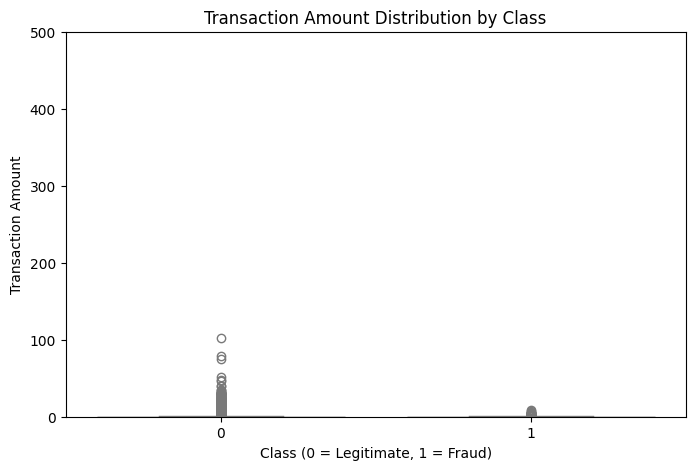

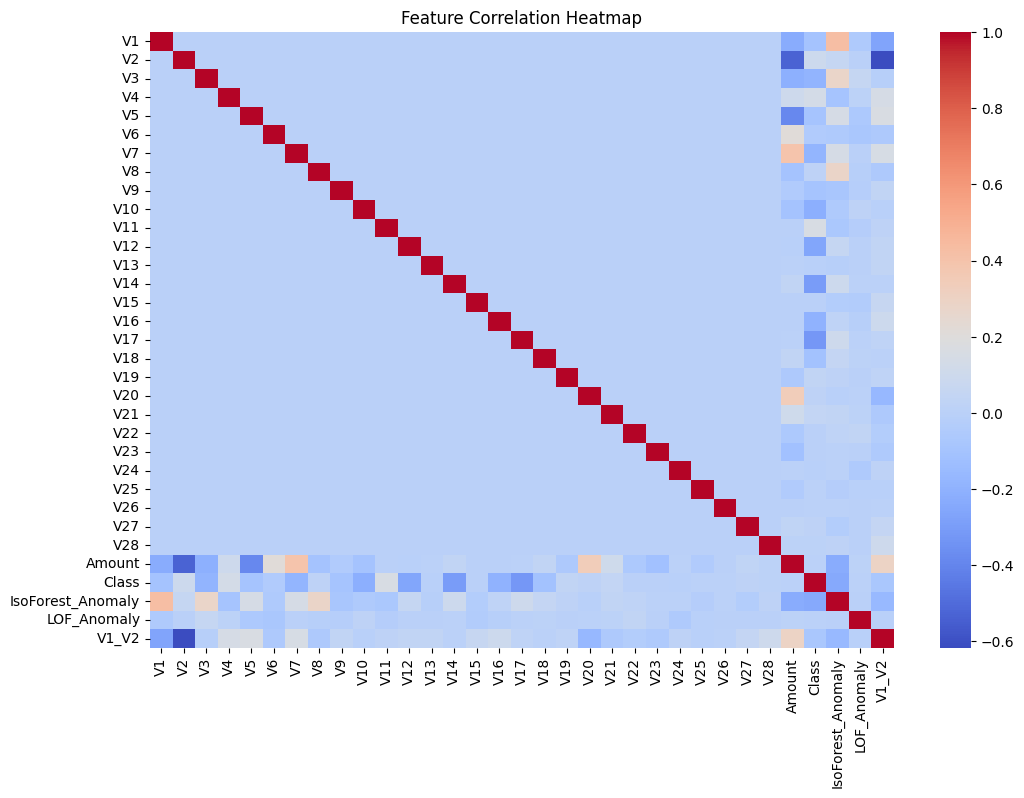

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Class"], y=df["Amount"], palette="coolwarm")
plt.ylim(0, 500)  # Adjust based on dataset
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
